<a href="https://colab.research.google.com/github/VaibhavNagrale007/Natural-Language-Processing/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP-Project/Hydra-Movie-Scrape.csv")

In [ ]:
df

In [ ]:
df_wiki = pd.read_csv("/content/drive/MyDrive/NLP-Project/wiki_movie_plots_deduped.csv")

In [ ]:
df_wiki

In [ ]:
movies = set()
for index, row in df.iterrows():
  title_and_year = (row['Title'], str(row['Year']))
  if title_and_year not in movies:
    movies.add(title_and_year)

KeyError: ignored

In [ ]:
movies_wiki = set()
for index, row in df_wiki.iterrows():
  title_and_year = (row['Title'], str(row['Release Year']))
  if title_and_year not in movies_wiki:
    movies_wiki.add(title_and_year)

KeyError: ignored

In [ ]:
movies = movies.intersection(movies_wiki)

In [ ]:
len(movies)

1921

In [ ]:
data_wiki = {'Title' : [], 'Plot' : []}
data = {'Title' : [], 'Summary' : [], 'Short Summary' : []}

In [ ]:
added = set()
for index, row in df.iterrows():
  title_and_year = (row['Title'], str(row['Year']))
  if title_and_year in movies and title_and_year not in added:
    added.add(title_and_year)
    data['Title'].append(f"{row['Title']} ({str(row['Year'])})")
    data['Summary'].append(row['Summary'])
    data['Short Summary'].append(row['Short Summary'])

In [ ]:
added = set()
for index, row in df_wiki.iterrows():
  title_and_year = (row['Title'], str(row['Release Year']))
  if title_and_year in movies and title_and_year not in added:
    added.add(title_and_year)
    data_wiki['Title'].append(f"{row['Title']} ({str(row['Release Year'])})")
    data_wiki['Plot'].append(row['Plot'])

In [ ]:
df_cleaned = pd.DataFrame.from_dict(data)
df_wiki_cleaned = pd.DataFrame.from_dict(data_wiki)

In [ ]:
df_cleaned

NameError: ignored

In [ ]:
df_wiki_cleaned

In [ ]:
#df_wiki_cleaned.to_csv('/content/drive/MyDrive/NLP-Project/wiki-cleaned.csv', index = False)

In [ ]:
#df_cleaned.to_csv('/content/drive/MyDrive/NLP-Project/hydra-cleaned.csv', index = False)

In [ ]:
df_wiki = pd.read_csv('/content/drive/MyDrive/NLP-Project/wiki-cleaned.csv')
df = pd.read_csv('/content/drive/MyDrive/NLP-Project/hydra-cleaned.csv')

In [ ]:
df_wiki

,Title,Plot
0,Almost Famous (2000),"In 1969, child prodigy William Miller struggle..."
1,American Psycho (2000),"In 1987, wealthy New York investment banker Pa..."
2,Animal Factory (2000),"Ron Decker, a young man convicted for drug pos..."
3,The Beach (2000),"Richard, a young American seeking adventure in..."
4,Bedazzled (2000),The opening sequence takes the form of a compu...
...,...,...
1916,The Mimic (2017),A woman whose son is missing takes in a young ...
1917,Memoir of a Murderer (2017),Byeong-soo (Sol Kyung-gu) was a serial killer....
1918,Forgotten (2017),A man loses his memory after being kidnapped f...
1919,Once Upon a Time in Anatolia (2011),"Through the night, three cars carry a small gr..."


In [ ]:
df

,Title,Summary,Short Summary
0,New York Doll (2005),A recovering alcoholic and recently converted ...,A recovering alcoholic and recently converted ...
1,Hostiles (2017),"In 1892, after nearly two decades of fighting ...","In 1892, a legendary Army Captain reluctantly ..."
2,Walk Hard: The Dewey Cox Story (2007),The up-and-down-and-up-again story of musician...,Singer Dewey Cox overcomes adversity to become...
3,Freaky Friday (2003),The wide generation gap between Tess Coleman a...,An overworked mother and her daughter do not g...
4,5 Centimeters Per Second (2007),Takaki and Akari are two classmates in element...,"Told in three interconnected segments, we foll..."
...,...,...,...
1916,A Hard Day (2014),"Detective Go Geon-soo is having a hard day, an...",After trying to cover up a car accident that l...
1917,Roll Bounce (2005),1970s roller-skate jams fuel this coming-of-ag...,"In the summer of 1978, a teenager and his grou..."
1918,The 8-Year Engagement (2017),Twenty-somethings Hisashi and Mai are engaged....,Twenty-somethings Hisashi and Mai are engaged....
1919,Mr. Magorium's Wonder Emporium (2007),Molly Mahoney is the manager of Mr. Magorium's...,Molly Mahoney is the awkward and insecure mana...


In [ ]:
#using pretrained embedding
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-12-02 09:46:23--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-12-02 09:46:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-12-02 09:46:24--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip -q glove.6B.zip.1

unzip:  cannot find or open glove.6B.zip.1, glove.6B.zip.1.zip or glove.6B.zip.1.ZIP.


In [ ]:
import numpy as np
print('Indexing word vectors-100d.')

embeddings_index_100d = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index_100d[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index_100d))

Indexing word vectors-100d.
Found 400000 word vectors.


In [ ]:
#example for two random words
word1_embedding=embeddings_index_100d['movie']
print("Size of the embedding:",word1_embedding.shape,"\n")
word1_embedding

Size of the embedding: (100,) 



array([ 0.38251  ,  0.14821  ,  0.60601  , -0.51533  ,  0.43992  ,
        0.061053 , -0.62716  , -0.025385 ,  0.1643   , -0.22101  ,
        0.14423  , -0.37213  , -0.21683  , -0.08895  ,  0.097904 ,
        0.6561   ,  0.64455  ,  0.47698  ,  0.83849  ,  1.6486   ,
        0.88922  , -0.1181   , -0.012465 , -0.52082  ,  0.77854  ,
        0.48723  , -0.014991 , -0.14127  , -0.34747  , -0.29595  ,
        0.1028   ,  0.57191  , -0.045594 ,  0.026443 ,  0.53816  ,
        0.32257  ,  0.40788  , -0.043599 , -0.146    , -0.48346  ,
        0.32036  ,  0.55086  , -0.76259  ,  0.43269  ,  0.61753  ,
       -0.36503  , -0.60599  , -0.79615  ,  0.3929   , -0.23668  ,
       -0.34719  , -0.61201  ,  0.54747  ,  0.94812  ,  0.20941  ,
       -2.7771   , -0.6022   ,  0.8495   ,  1.2549   ,  0.017893 ,
       -0.041901 ,  2.1147   , -0.026618 , -0.28104  ,  0.68124  ,
       -0.14165  ,  0.99249  ,  0.49879  , -0.67538  ,  0.6417   ,
        0.42303  , -0.27913  ,  0.063403 ,  0.68909  , -0.3618

In [ ]:
def cosine_similarity_calc(vec_1,vec_2):
	sim = np.dot(vec_1,vec_2)/(np.linalg.norm(vec_1)*np.linalg.norm(vec_2))
	return sim

In [ ]:
#example cosine similarity

word1= "movie"
word2="film"

print(f"Cosine similarity between {word1} and {word2} (100d):",
      cosine_similarity_calc(embeddings_index_100d[word1], embeddings_index_100d[word2]))

Cosine similarity between movie and film (100d): 0.90551215


In [ ]:
import numpy as np
print('Indexing word vectors-300d.')

embeddings_index_300d = {}
f = open('glove.6B.300d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index_300d[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index_300d))

Indexing word vectors-300d.
Found 400000 word vectors.


In [ ]:
print(f"Cosine similarity between {word1} and {word2} (300d):",
      cosine_similarity_calc(embeddings_index_300d[word1], embeddings_index_300d[word2]))

Cosine similarity between movie and film (300d): 0.85887855


In [ ]:
#Installing and importing the basic packages required.
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([word for word in text if word not in string.punctuation])
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
encoding_map = {}
for title in set(df_wiki['Title']):
  encoding_map[title] = len(encoding_map)

In [ ]:
reverse_encoding_map = {}
for key, value in encoding_map.items():
  reverse_encoding_map[value] = key

In [ ]:
df['labels'] = [encoding_map[title] for title in df['Title']]
df_wiki['labels'] = [encoding_map[title] for title in df_wiki['Title']]

In [ ]:
X_train, X_test, y_train, y_test = df_wiki['Plot'], df['Summary'], df_wiki['labels'], df['labels']

In [ ]:
# Apply vectorization to both training and testing data
X_train_logi = X_train.apply(preprocess)
X_test_logi = X_test.apply(preprocess)

In [ ]:
#function to find unique words
import re
def find_unique_words(preprocessed):
  word_list=[]
  words = re.findall(r'\w+', preprocessed)
  for word in words:
    if word not in word_list:
        word_list.append(word)
  return word_list

In [ ]:
#function for embedding the review texts
embedding_dim = 100
def paragraph_embedding(text):
  wordlist_doc = find_unique_words(text)
  num_tokens = len(wordlist_doc)
  embedding_matrix=np.zeros((num_tokens, embedding_dim))
  for i in range(0,len(wordlist_doc)):
    try:
      embedding_matrix[i]=embeddings_index_100d[wordlist_doc[i]]
    except:
      pass
  words_vecs = np.array(embedding_matrix)
  words_vecs.mean(axis=0)
  return words_vecs.mean(axis=0)

In [ ]:
#function for embedding the review texts
embedding_dim = 100
def paragraph_embedding_norm(text):
  wordlist_doc = find_unique_words(text)
  num_tokens = len(wordlist_doc)
  embedding_matrix=np.zeros((num_tokens, embedding_dim))
  for i in range(0,len(wordlist_doc)):
    try:
      embedding_matrix[i]=embeddings_index_100d[wordlist_doc[i]]
    except:
      pass
  words_vecs = np.array(embedding_matrix)
  words_vecs = words_vecs.mean(axis=0)
  return  words_vecs/(1 if np.linalg.norm(words_vecs) == 0 else np.linalg.norm(words_vecs))

In [ ]:
X_train_logi = np.array([paragraph_embedding_norm(review) for review in X_train_logi])
X_test_logi = np.array([paragraph_embedding_norm(review) for review in X_test_logi])

In [ ]:
X_train_logi[0]

array([-2.05185045e-02,  2.52313339e-02,  9.45062586e-02, -4.93579458e-02,
        1.42034033e-02,  9.69163893e-02, -5.15251935e-02,  5.45395650e-02,
       -1.78276960e-03, -3.77485817e-02,  3.30127902e-02, -1.79305340e-02,
        4.69303414e-02,  2.46308687e-02,  2.01809216e-02, -5.34925720e-02,
        3.57083169e-02,  1.57726415e-02, -8.52605141e-02,  9.93576126e-02,
        4.22532683e-02, -1.93998436e-02,  7.69196865e-03, -2.05504936e-02,
        7.49938749e-02, -1.00507772e-02, -5.86543430e-02, -1.30161647e-01,
        8.68626978e-02,  9.07885022e-03, -4.78521073e-02,  1.38655233e-01,
       -6.93109578e-03,  2.07325306e-02, -2.86830048e-02,  5.38185817e-02,
       -2.24350747e-02,  5.94470983e-03,  4.49563915e-04, -3.40730457e-02,
       -1.15366701e-01, -2.75025603e-02,  4.93651759e-02, -4.18425370e-02,
       -1.61019292e-02, -1.66552459e-02, -2.24670762e-02, -4.58392322e-02,
        4.82229800e-02, -1.50466086e-01,  2.20636024e-02, -3.95554330e-02,
        3.23412931e-02,  

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2)
data_2d = pca.fit_transform(X_train_logi)
x, y = np.hsplit(data_2d, 2)

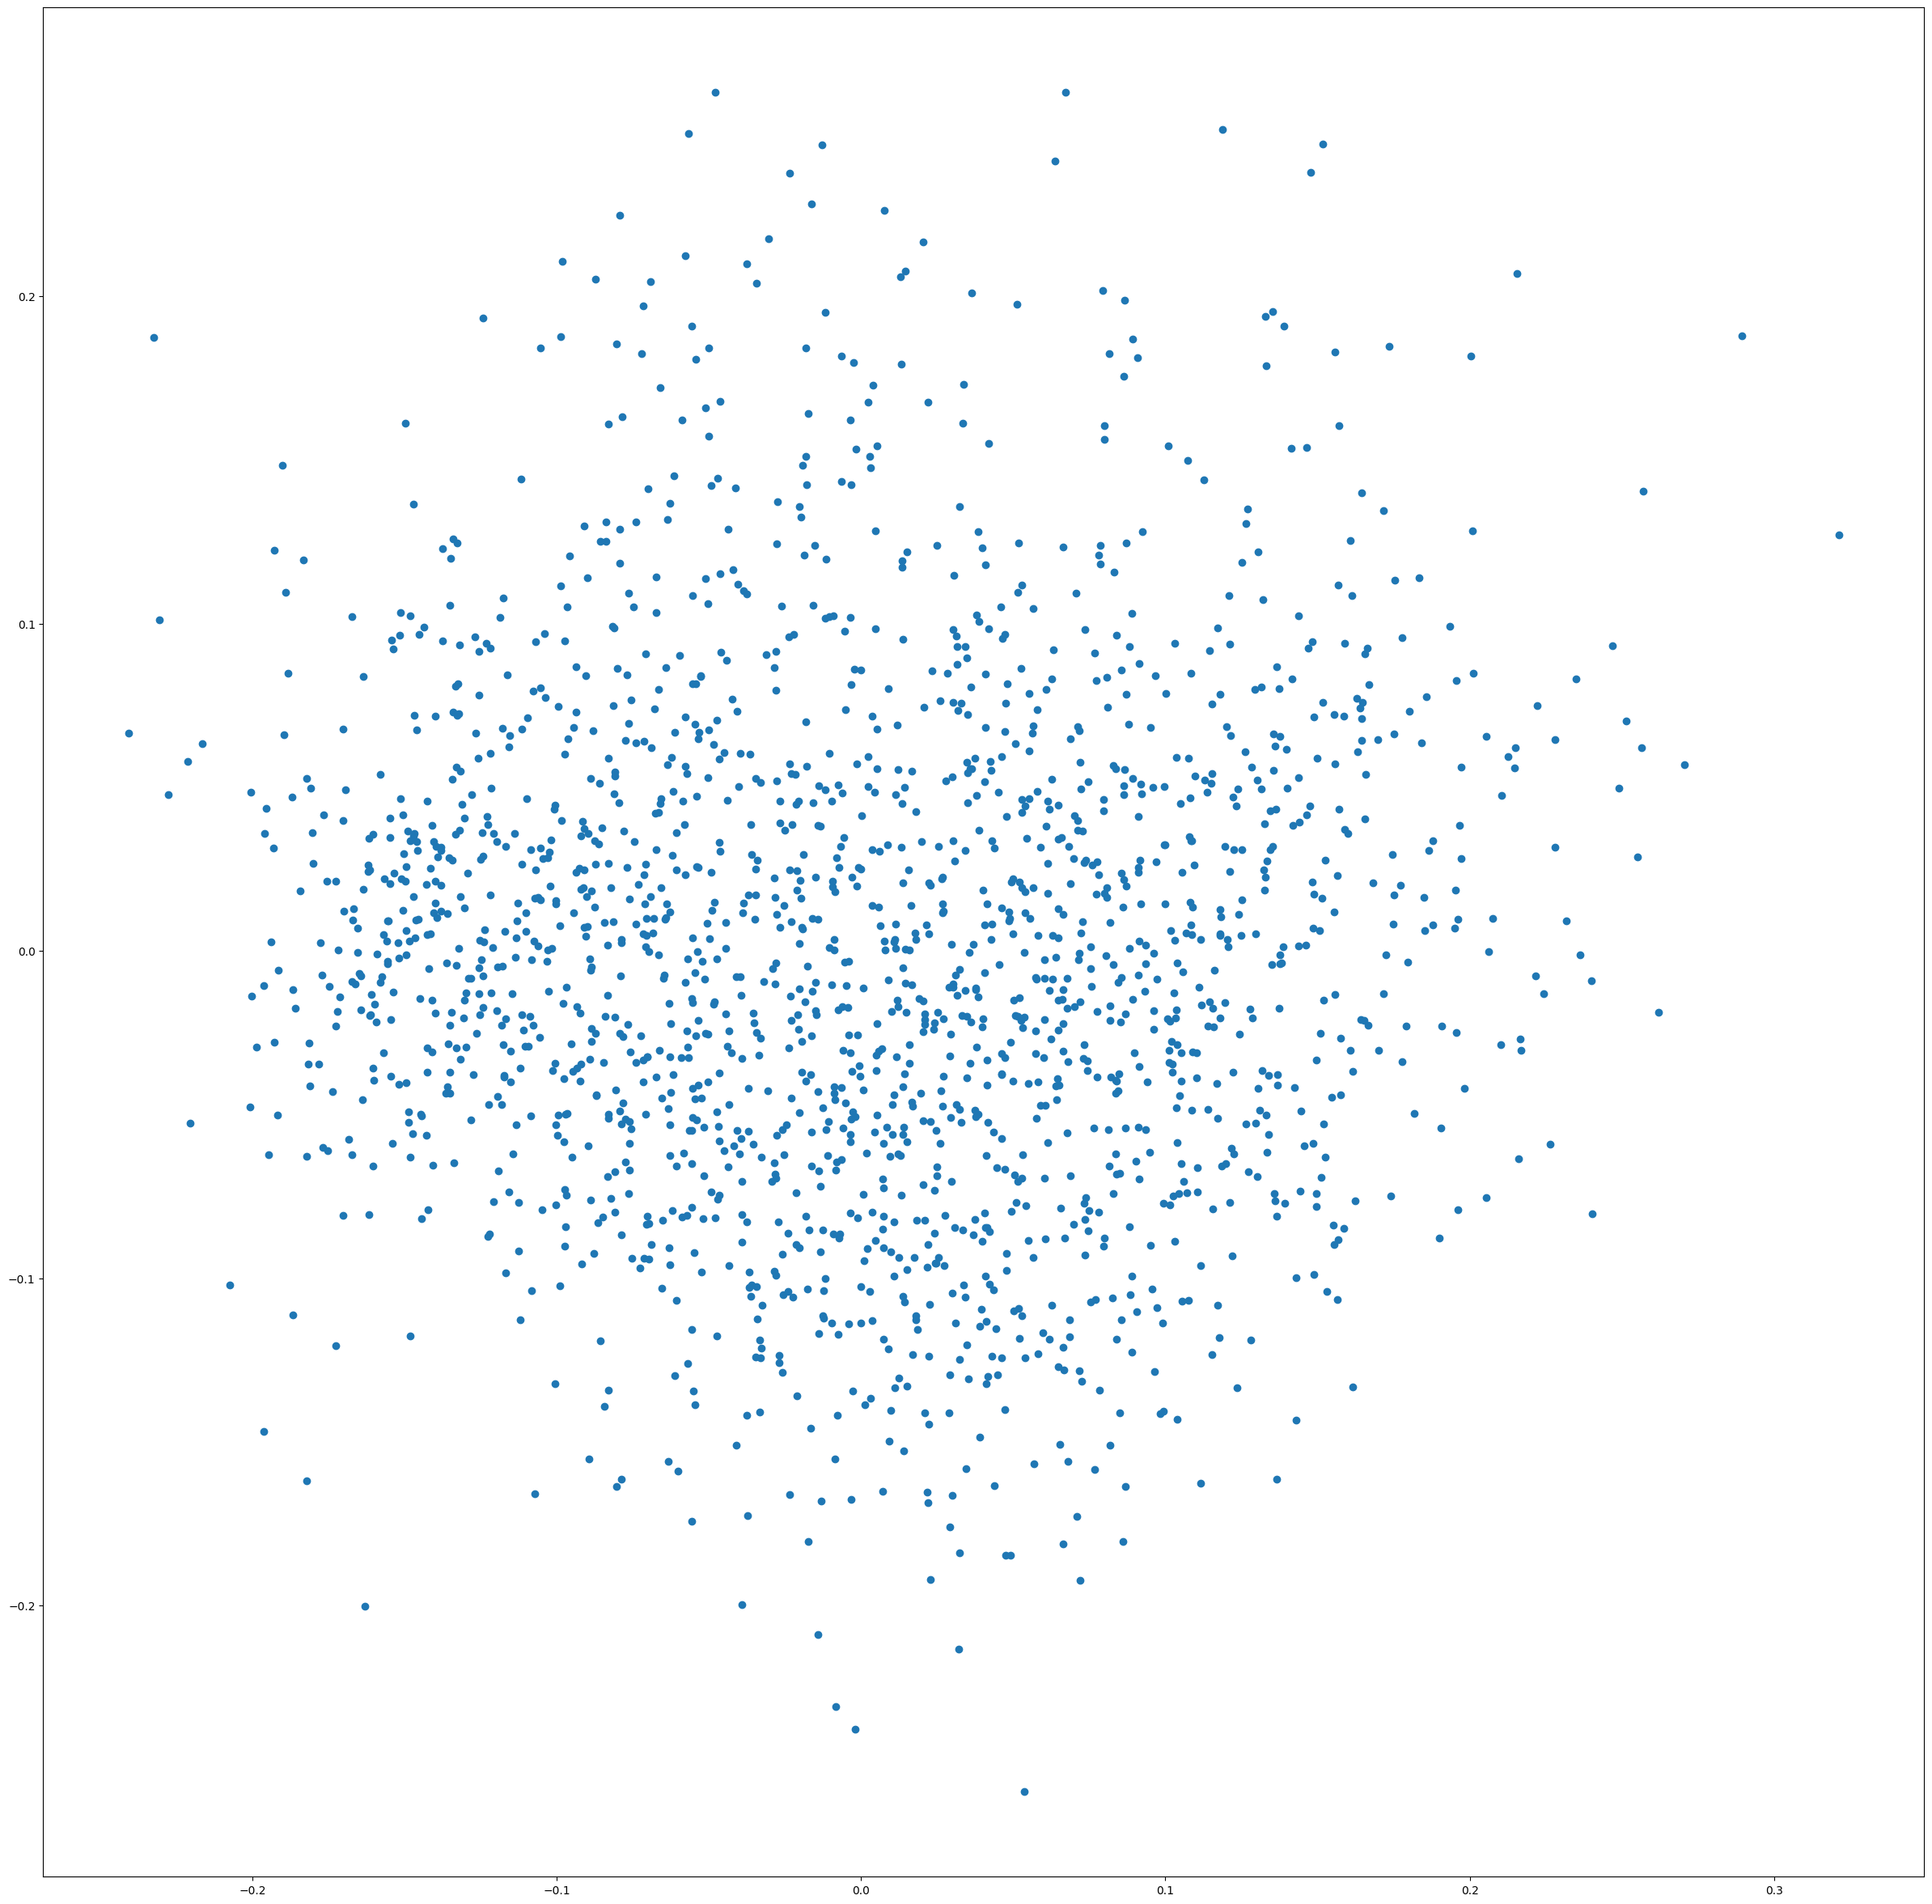

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots()
ax.scatter(x[:100],y[:100])
for i, txt in enumerate(df['Title'][:100]):
  ax.annotate(txt, (x[i], y[i]))

In [ ]:
#classification using Logistic Regression, provided by sklearn

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr', solver='lbfgs')
model.fit(X_train_logi, y_train)

LogisticRegression(multi_class='ovr')

In [ ]:
print(model.score(X_test_logi, y_test))

0.03695991671004685


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test_logi)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1 score:', f1_score(y_test, y_pred, average='micro'))

Accuracy: 0.03695991671004685
Precision: 0.03695991671004685
Recall: 0.03695991671004685
F1 score: 0.03695991671004685


In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=342154a7a37e12d939a86abff500b1d17d73346ebb44151e0bf56dbcf38e63be
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
sentence_transformer_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2') # use multilingual models for texts with non-english characters



.gitattributes:   0%|          | 0.00/968 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

unigram.json:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
import spacy
import nltk
from nltk.corpus import wordnet
import random
import re

nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def get_wordnet_pos(tag):
    tag = tag[0].upper()
    tag_dict = {'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV, 'J': wordnet.ADJ}
    return tag_dict.get(tag, wordnet.NOUN)

def get_synonym(word, pos):
    synsets = list(wordnet.synsets(word, pos=get_wordnet_pos(pos)))
    if synsets:
        synonyms = [lemma.name() for synset in synsets for lemma in synset.lemmas()]
        if synonyms:
            return random.choice(synonyms)
    return word

def paraphrase_token(token):
    if token.ent_type_ != '':
        return get_synonym(token.text, token.pos_)
    elif token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV'] and random.random() < 0.5:
        # Replace nouns, verbs, adjectives, and adverbs with a synonym (50% chance)
        return get_synonym(token.text, token.pos_)
    else:
        return token.text

def paraphrase_sentence(sentence):
    doc = nlp(sentence)
    paraphrased_tokens = [paraphrase_token(token) for token in doc]
    return ' '.join(paraphrased_tokens)

def add_paraphrases(x, y, num_paraphrases, keep_original = True):
  more_x = []
  more_y = []
  for text, label in tqdm(zip(x, y), total=len(x)):
    doc = nlp(str(text))
    sentences = [sent.text for sent in doc.sents]
    for _ in range(num_paraphrases):
        random.shuffle(sentences)  # Shuffle sentences independently for each paraphrase

        reordered_text = ' '.join(sentences)
        paraphrased_text = ' '.join(paraphrase_sentence(sentence) for sentence in sentences)

        # Post-processing
        paraphrased_text = paraphrased_text.replace('_', ' ')  # Remove underscores
        paraphrased_text = re.sub(r'\s+', ' ', paraphrased_text)  # Remove extra spaces
        more_x.append(paraphrased_text)
        more_y.append(label)
  if keep_original:
    more_x.extend(x)
    more_y.extend(y)
  return more_x, more_y

In [ ]:
import random
from tqdm import tqdm
def randomly_remove_and_add_sentences(x, y, num_paragraphs, probability = None, keep_original = True):
  more_x = []
  more_y = []
  for text, label in tqdm(zip(x, y), total=len(x)):
    doc = nlp(str(text))
    sentences = [str(sent) for sent in doc.sents]
    added = 0
    while added < num_paragraphs:
      para = ""
      if probability is None:
        prob = random.random()
      else:
        prob = probability
      for sentence in sentences:
        if random.random() <= prob:
          para += " " + sentence
      para = para.strip()
      if len(para) != 0:
        more_x.append(para)
        more_y.append(label)
        added += 1
  if keep_original:
    more_x.extend(x)
    more_y.extend(y)
  return more_x, more_y

In [ ]:
def prune(labels_count, X_train, y_train, X_test, y_test):
  xtrain = []
  ytrain = []
  xtest = []
  ytest = []
  for i, j in zip(X_train, y_train):
    if j < labels_count:
      xtrain.append(i)
      ytrain.append(j)

  for i, j in zip(X_test, y_test):
    if j < labels_count:
      xtest.append(i)
      ytest.append(j)
  return xtrain, ytrain, xtest, ytest

In [ ]:
X_train, X_test, y_train, y_test = df_wiki['Plot'], df['Summary'], df_wiki['labels'], df['labels']

In [ ]:
labels_count = 512

In [ ]:
X_train, y_train, X_test, y_test = prune(labels_count, X_train, y_train, X_test, y_test)

In [ ]:
X_train, y_train = add_paraphrases(X_train, y_train, 2)

100%|██████████| 512/512 [08:00<00:00,  1.07it/s]


In [ ]:
X_train, y_train = randomly_remove_and_add_sentences(X_train, y_train, 2)

100%|██████████| 1536/1536 [03:43<00:00,  6.86it/s]


In [ ]:
sentences_train = X_train
sentences_test = X_test

In [ ]:
embeddings_train = []
for text in tqdm(sentences_train, total=len(sentences_train)):
  embeddings_train.append(sentence_transformer_model.encode(text))

100%|██████████| 4608/4608 [12:38<00:00,  6.07it/s]


In [ ]:
embeddings_test = []
for text in tqdm(sentences_test, total=len(sentences_test)):
  embeddings_test.append(sentence_transformer_model.encode(text))

100%|██████████| 512/512 [01:14<00:00,  6.86it/s]


In [ ]:
embeddings_train = [sentence_transformer_model.encode(text) for text in sentences_train]

In [ ]:
embeddings_test = [sentence_transformer_model.encode(text) for text in sentences_test]

In [ ]:
import numpy as np
def normalize(vec):
  return vec/(1 if np.linalg.norm(vec) == 0 else np.linalg.norm(vec))

In [ ]:
embeddings_train_norm = [normalize(vec) for vec in embeddings_train]
embeddings_test_norm = [normalize(vec) for vec in embeddings_test]

In [ ]:
#classification using Logistic Regression, provided by sklearn

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr', solver='lbfgs')
model.fit(embeddings_train_norm, y_train)

LogisticRegression(multi_class='ovr')

In [ ]:
print(model.score(embeddings_test_norm, y_test))

0.810546875


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

#Train the model using the training sets
clf.fit(embeddings_train_norm, y_train)

GaussianNB()

In [ ]:
print(clf.score(embeddings_test_norm, y_test))

0.615234375


In [ ]:
print(clf.score(embeddings_train_norm, y_train))

1.0


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=3)
data_2d = pca.fit_transform(embeddings_train_norm)
x, y, z = np.hsplit(data_2d, 3)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,30)
fig, ax = plt.subplots()
ax.scatter(x,y)

In [ ]:
model = LogisticRegression(multi_class='auto')
model.fit(embeddings_train, y_train)

In [ ]:
# Evaluate model performance on test set
accuracy = model.score(embeddings_test, y_test)
print("Accuracy:", accuracy)

# Make predictions on new data

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(embeddings_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro', zero_division=1))
print('Recall:', recall_score(y_test, y_pred, average='macro', zero_division=1))
print('F1 score:', f1_score(y_test, y_pred, average='macro', zero_division=1))

In [ ]:
new_data = ['spider man goblin']
new_X = sentence_transformer_model.encode(new_data)
predictions = model.predict(new_X)
print("Prediction:", reverse_encoding_map[predictions[0]])

Prediction: Spider-Man 2 (2004)


In [ ]:
def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

In [ ]:
def find_movies(text, max_dist = 5):
  res = []
  for index, row in df_wiki_cleaned.iterrows():
    if levenshteinDistance(text, row['Title']) <= max_dist:
      res.append((row['Title'], row['Plot']))
  return res

In [ ]:
for i in find_movies("Interstellar (2014)",1):
  print(i[1])

In the mid-21st century, crop blights and dust storms threaten humanity's survival. Joseph Cooper, a widowed engineer and former NASA pilot, runs a farm with his father-in-law Donald, son Tom, and daughter Murphy. Living in a post-truth society, Cooper is reprimanded for telling Murphy that the Apollo missions were not fake; he encourages her to carefully observe and record what she sees. They discover that dust patterns, which Murphy first attributes to a ghost, result from gravity variations, and translate into geographic coordinates. These lead them to a secret NASA facility headed by Cooper's former supervisor, Professor John Brand, who explains that 48 years earlier a wormhole appeared near Saturn, opening a path to a distant galaxy with twelve potentially habitable planets located near a black hole named Gargantua. Volunteers had previously traveled through the wormhole to evaluate the planets, with Miller, Edmunds, and Mann reporting back desirable results. Brand explains he has

In [ ]:
def find_movies_test(text, max_dist = 5):
  res = []
  for index, row in df_cleaned.iterrows():
    if levenshteinDistance(text, row['Title']) <= max_dist:
      res.append((row['Title'], row['Summary']))
  return res

In [ ]:
for i in find_movies_test("Spider-Man",13):
  print(i[0])

Rough work

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.data.path

['/root/nltk_data',
 '/usr/nltk_data',
 '/usr/share/nltk_data',
 '/usr/lib/nltk_data',
 '/usr/share/nltk_data',
 '/usr/local/share/nltk_data',
 '/usr/lib/nltk_data',
 '/usr/local/lib/nltk_data']

In [ ]:
from nltk.corpus import wordnet

for i in range(10):
  dog = wordnet.synset('fat.n.02')

In [ ]:
texts = df_wiki['Plot']
texts = ["Let us India to the gym"]

In [ ]:
import random
conv = []
for text in texts:
  tokens = word_tokenize(text)
  words = []
  for token in tokens:
    try:
      synonyms = wordnet.synset(token + '.n.03').lemma_names()
      index = random.randint(0, len(synonyms))
      print(synonyms)
      if index == len(synonyms):
        words.append(token)
      else:
        words.append(synonyms[index])
    except:
      words.append(token)
  conv.append(" ".join(words))

In [ ]:
wordnet.synset('water' + '.n.3').lemma_names()

['water']

In [ ]:
conv[0]

'Let us India to the gym'

In [ ]:
df_wiki['Plot'][0]

'In 1969, child prodigy William Miller struggles to fit in with the world. His widowed mother Elaine has led him to believe he is 13 years old, until William\'s older sister, Anita, tells their mother to tell the truth. His age is actually 11; his mother had him start first grade at 5 years old and then he skipped fifth grade. Their mother strictly controls and protects him and Anita, forbidding rock music and other unwelcome influences, driving Anita to leave home and become a flight attendant.\r\nIn 1973, 15-year-old William, influenced by the rock albums left by his sister, aspires to be a rock journalist, writing freelance articles for underground papers in San Diego. Rock journalist Lester Bangs, impressed with his writing, gives him a $35 assignment to review a Black Sabbath concert. He can\'t get backstage, but opening band Stillwater arrives, and after he flatters them with critical praise they bring him along. Lead guitarist Russell Hammond takes a liking to him, partly becaus

In [ ]:
pip install git+https://github.com/PrithivirajDamodaran/Parrot_Paraphraser.git

  Cloning https://github.com/PrithivirajDamodaran/Parrot_Paraphraser.git to /tmp/pip-req-build-s5qn902s
  Running command git clone --filter=blob:none --quiet https://github.com/PrithivirajDamodaran/Parrot_Paraphraser.git /tmp/pip-req-build-s5qn902s
  Resolved https://github.com/PrithivirajDamodaran/Parrot_Paraphraser.git to commit 720a87a1ee557d8ed8d9a021adbdd1dd5616c5f9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.8 MB/s eta 0:00:00
  Created wheel for parrot: filename=parrot-1.0-py3-none-any.whl size=8588 sha256=e6cf7debffdec6836301a98544d028202e250a4c89f1d3a4b10469a89e1db1b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-55aaz_k1/wheels/e8/ee/2a/

In [ ]:
from parrot import Parrot
import torch
import warnings
warnings.filterwarnings("ignore")

'''
uncomment to get reproducable paraphrase generations
def random_state(seed):
  torch.manual_seed(seed)
  if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

random_state(1234)
'''
parrot = Parrot(model_tag="prithivida/parrot_paraphraser_on_T5")


tokenizer_config.json:   0%|          | 0.00/1.89k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/913 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/476 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/736 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/686 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

----------------------------------------------------------------------------------------------------
Input_phrase:  In 1969, child prodigy William Miller struggles to fit in with the world. His widowed mother Elaine has led him to believe he is 13 years old, until William's older sister, Anita, tells their mother to tell the truth. His age is actually 11; his mother had him start first grade at 5 years old and then he skipped fifth grade. Their mother strictly controls and protects him and Anita, forbidding rock music and other unwelcome influences, driving Anita to leave home and become a flight attendant.
In 1973, 15-year-old William, influenced by the rock albums left by his sister, aspires to be a rock journalist, writing freelance articles for underground papers in San Diego. Rock journalist Lester Bangs, impressed with his writing, gives him a $35 assignment to review a Black Sabbath concert. He can't get backstage, but opening band Stillwater arrives, and after he flatters them 

In [ ]:
phrases = ["In 1969, child prodigy William Miller struggles to fit in with the world"]

for phrase in phrases:
  print("-"*100)
  print("Input_phrase: ", phrase)
  print("-"*100)
  para_phrases = parrot.augment(input_phrase=phrase,
                               use_gpu=False,
                               do_diverse=True,
                               max_return_phrases = 10,
                               max_length=1000)
  for para_phrase in para_phrases:
   print(para_phrase)

----------------------------------------------------------------------------------------------------
Input_phrase:  In 1969, child prodigy William Miller struggles to fit in with the world
----------------------------------------------------------------------------------------------------
('william miller struggled to fit in with the world in 1969 as a youngster', 58)
('william miller struggled to fit in with the world in 1969', 43)
('in 1969 william miller struggles to fit in with the world', 26)
('in 1969 the child prodigy william miller struggles to fit into the world', 20)
('in 1969 child prodigy william miller struggles to fit into the world', 16)
('in 1969 the child prodigy william miller struggles to fit in with the world', 16)
('in 1969 child prodigy william miller struggles to fit in with the world', 12)


In 1969, child prodigy William Miller struggles to fit in with the world. His widowed mother Elaine has led him to believe he is 13 years old, until William's older sister, Anita, tells their mother to tell the truth. His age is actually 11; his mother had him start first grade at 5 years old and then he skipped fifth grade. Their mother strictly controls and protects him and Anita, forbidding rock music and other unwelcome influences, driving Anita to leave home and become a flight attendant.\r\nIn 1973, 15-year-old William, influenced by the rock albums left by his sister, aspires to be a rock journalist, writing freelance articles for underground papers in San Diego. Rock journalist Lester Bangs, impressed with his writing, gives him a $35 assignment to review a Black Sabbath concert. He can't get backstage, but opening band Stillwater arrives, and after he flatters them with critical praise they bring him along."

In 1969, child prodigy William Miller struggles to fit in with the world. His widowed mother Elaine has led him to believe he is 13 years old, until William\'s older sister, Anita, tells their mother to tell the truth. His age is actually 11; his mother had him start first grade at 5 years old and then he skipped fifth grade. Their mother strictly controls and protects him and Anita, forbidding rock music and other unwelcome influences, driving Anita to leave home and become a flight attendant.\r\nIn 1973, 15-year-old William, influenced by the rock albums left by his sister, aspires to be a rock journalist, writing freelance articles for underground papers in San Diego. Rock journalist Lester Bangs, impressed with his writing, gives him a $35 assignment to review a Black Sabbath concert. He can\'t get backstage, but opening band Stillwater arrives, and after he flatters them with critical praise they bring him along.

In [ ]:
import spacy
import nltk
from nltk.corpus import wordnet
import random
import re

nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')

def get_wordnet_pos(tag):
    tag = tag[0].upper()
    tag_dict = {'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV, 'J': wordnet.ADJ}
    return tag_dict.get(tag, wordnet.NOUN)

def get_synonym(word, pos):
    synsets = list(wordnet.synsets(word, pos=get_wordnet_pos(pos)))
    if synsets:
        synonyms = [lemma.name() for synset in synsets for lemma in synset.lemmas()]
        if synonyms:
            return random.choice(synonyms)
    return word

def paraphrase_token(token):
    if token.ent_type_ != '' and random.random() < 0.5:
        # Replace named entities with a synonym (50% chance)
        return get_synonym(token.text, token.pos_)
    elif token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV'] and random.random() < 0.5:
        # Replace nouns, verbs, adjectives, and adverbs with a synonym (50% chance)
        return get_synonym(token.text, token.pos_)
    else:
        return token.text

def paraphrase_sentence(sentence):
    doc = nlp(sentence)
    paraphrased_tokens = [paraphrase_token(token) for token in doc]
    return ' '.join(paraphrased_tokens)

def reorder_and_paraphrase(text, num_paraphrases=5):
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]

    paraphrases = []
    for _ in range(num_paraphrases):
        random.shuffle(sentences)  # Shuffle sentences independently for each paraphrase

        reordered_text = ' '.join(sentences)
        paraphrased_text = ' '.join(paraphrase_sentence(sentence) for sentence in sentences)

        # Post-processing
        paraphrased_text = paraphrased_text.replace('_', ' ')  # Remove underscores
        paraphrased_text = re.sub(r'\s+', ' ', paraphrased_text)  # Remove extra spaces
        paraphrases.append(paraphrased_text)

    return paraphrases

# Example Usage:
input_text = """
    Natural language processing is a subfield of artificial intelligence that deals with the interaction between computers and humans using natural language.
    This technology enables computers to understand, interpret, and generate human-like text.
    NLP has applications in various domains, including chatbots, sentiment analysis, and language translation.
"""

paraphrases = reorder_and_paraphrase(input_text, num_paraphrases=5)

print("Original Text:\n", input_text)
print("\nParaphrases:")
for i, paraphrase in enumerate(paraphrases, start=1):
    print(f"Paraphrase {i}:\n{paraphrase}\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original Text:
 
    Natural language processing is a subfield of artificial intelligence that deals with the interaction between computers and humans using natural language.
    This technology enables computers to understand, interpret, and generate human-like text.
    NLP has applications in various domains, including chatbots, sentiment analysis, and language translation.


Paraphrases:
Paraphrase 1:
This engineering science enables computers to sympathize , read , and generate human - like text . NLP get applications in various domains , include chatbots , thought analysis , and language displacement . Natural language processing is a subfield of artificial intelligence that portion out with the interaction between estimator and humans use cancel language . 

Paraphrase 2:
human language technology ingest practical application in various domain , including chatbots , sentiment analysis , and language translation . This engineering enable reckoner to understand , interpret , and g